In [1]:
# CSCI3230 / ESTR3108 2025-26 First Term Assignment 2
# I declare that the assignment here submitted is original except for source
# material explicitly acknowledged, and that the same or closely related material
# has not been previously submitted for another course. I also acknowledge that I
# am aware of University policy and regulations on honesty in academic work, and
# of the disciplinary guidelines and procedures applicable to breaches of such
# policy and regulations, as contained in the following websites.
# University Guideline on Academic Honesty:
# http://www.cuhk.edu.hk/policy/academichonesty/
# Faculty of Engineering Guidelines to Academic Honesty:`
# http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
# Student Name: Wong Kwok Kam
# Student ID : 1155192018

Support Vectors:
  Index 1: x = (3.5, -2.0), y = 1
  Index 8: x = (4.0, -3.5), y = -1

Optimal weight vector: w* = (-0.40, 1.20)
Optimal bias: b* = 4.80

Optimal Hyperplane: f(x) = -0.40x₁ + 1.20x₂ + 4.80

Verification:
Constraint Σ αᵢyᵢ = 0.00 ✓
Point 1: y*f(x) = 1.00 ✓
Point 2: y*f(x) = 4.60 ✓
Point 3: y*f(x) = 7.20 ✓
Point 4: y*f(x) = 1.40 ✓
Point 5: y*f(x) = 3.00 ✓
Point 6: y*f(x) = 4.40 ✓
Point 7: y*f(x) = 1.20 ✓
Point 8: y*f(x) = 1.00 ✓


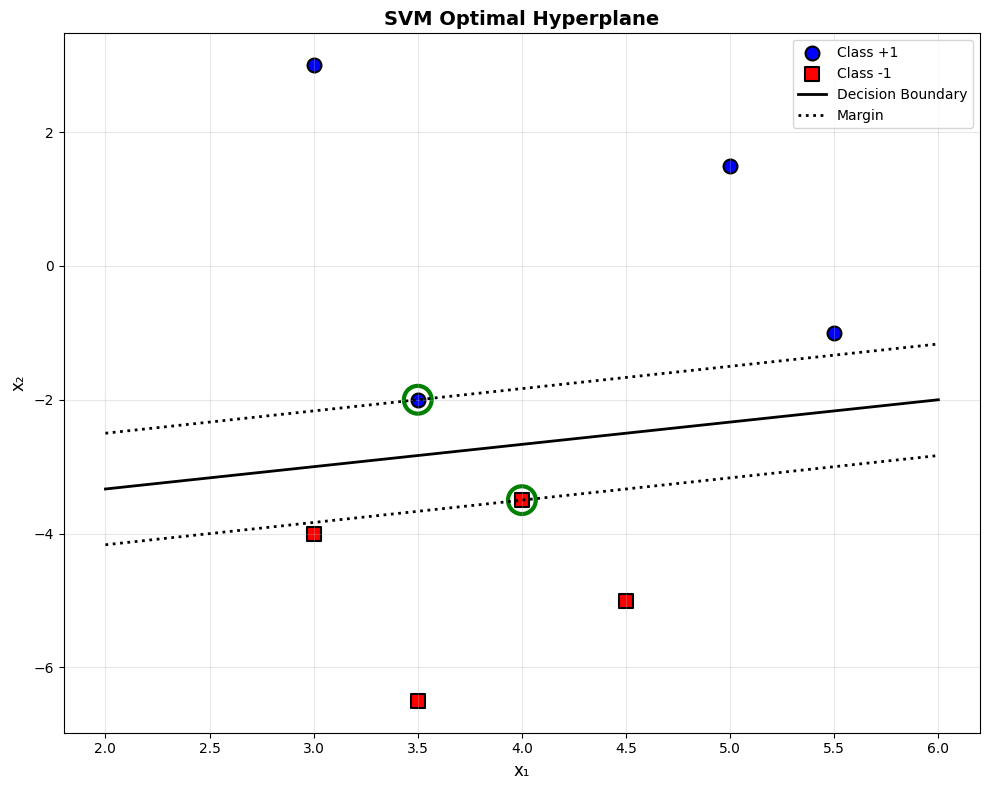

In [11]:
# Q1(a) Optimization Problem

import numpy as np
import matplotlib.pyplot as plt

# Training set
x1_train = np.array([3.5, 5, 3, 5.5, 4.5, 3.5, 3, 4])
x2_train = np.array([-2, 1.5, 3, -1, -5, -6.5, -4, -3.5])
X_train = np.column_stack([x1_train, x2_train])
y_train = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# Given optimal alphas
alphas = np.array([0.8, 0, 0, 0, 0, 0, 0, 0.8])

# Identify support vectors (α > 0)
support_vector_indices = np.where(alphas > 0)[0]
print("Support Vectors:")
for idx in support_vector_indices:
    print(
        f"  Index {idx + 1}: x = ({X_train[idx, 0]}, {X_train[idx, 1]}), y = {y_train[idx]}"
    )

# Calculate w* = Σ αᵢ yᵢ xᵢ
w = np.sum(alphas[:, np.newaxis] * y_train[:, np.newaxis] * X_train, axis=0)
print(f"\nOptimal weight vector: w* = ({w[0]:.2f}, {w[1]:.2f})")

# Calculate b* using support vectors
b_values = []
for idx in support_vector_indices:
    b_i = y_train[idx] - np.dot(w, X_train[idx])
    b_values.append(b_i)
b = np.mean(b_values)
print(f"Optimal bias: b* = {b:.2f}")

# Optimal hyperplane
print(f"\nOptimal Hyperplane: f(x) = {w[0]:.2f}x₁ + {w[1]:.2f}x₂ + {b:.2f}")

# Verification
print("\nVerification:")
constraint = np.sum(alphas * y_train)
print(f"Constraint Σ αᵢyᵢ = {constraint:.2f} {"✓" if constraint == 0 else "✗"}")
for i in range(len(X_train)):
    decision = np.dot(w, X_train[i]) + b
    margin = y_train[i] * decision
    print(f"Point {i + 1}: y*f(x) = {margin:.2f} {"✓" if margin >= 0.99 else "✗"}")

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot training points
positive_mask = y_train == 1
negative_mask = y_train == -1
ax.scatter(
    X_train[positive_mask, 0],
    X_train[positive_mask, 1],
    c="blue",
    marker="o",
    s=100,
    label="Class +1",
    edgecolors="k",
    linewidths=1.5,
)
ax.scatter(
    X_train[negative_mask, 0],
    X_train[negative_mask, 1],
    c="red",
    marker="s",
    s=100,
    label="Class -1",
    edgecolors="k",
    linewidths=1.5,
)

# Highlight support vectors
for idx in support_vector_indices:
    ax.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        s=400,
        facecolors="none",
        edgecolors="green",
        linewidths=3,
    )

# Plot decision boundary and margins
x1_plot = np.linspace(2, 6, 100)
x2_decision = -(w[0] * x1_plot + b) / w[1]
x2_margin_plus = -(w[0] * x1_plot + b - 1) / w[1]
x2_margin_minus = -(w[0] * x1_plot + b + 1) / w[1]

ax.plot(x1_plot, x2_decision, "k-", linewidth=2, label="Decision Boundary")
ax.plot(x1_plot, x2_margin_plus, "k:", linewidth=2, label="Margin")
ax.plot(x1_plot, x2_margin_minus, "k:", linewidth=2)

ax.set_xlabel("x₁", fontsize=12)
ax.set_ylabel("x₂", fontsize=12)
ax.set_title("SVM Optimal Hyperplane", fontsize=14, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
# Q1(b) Test on Test Set

# ============================================
# Given: Optimal Hyperplane Parameters
# ============================================
w = np.array([-0.4, 1.2])  # Weight vector
b = 4.8  # Bias term

# ============================================
# Test Data
# ============================================
x1_test = np.array([5.5, 3.5, 4.5, 2.5, 3.5, 2.5, 4, 5])
x2_test = np.array([0.5, -0.5, 1.5, -1, -4.5, -4, -6, -5])
X_test = np.column_stack([x1_test, x2_test])
y_test = np.array([1, 1, 1, 1, -1, -1, -1, -1])

# ============================================
# Step 1: Compute Decision Function f(x)
# ============================================
def decision_function(X, w, b):
    """
    Compute f(x) = w·x + b for each point

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - f_x: array of decision function values
    """
    return np.dot(X, w) + b


# ============================================
# Step 2: Make Predictions
# ============================================
def predict(f_x):
    """
    Predict class labels using sign(f(x))

    Parameters:
    - f_x: array of decision function values

    Returns:
    - y_pred: predicted labels (+1 or -1)
    """
    return np.where(f_x >= 0, 1, -1)


# ============================================
# Step 3: Compute Distance to Hyperplane (Not required)
# ============================================
def distance_to_hyperplane(X, w, b):
    """
    Compute perpendicular distance from points to hyperplane

    Parameters:
    - X: array of shape (n_samples, n_features)
    - w: weight vector
    - b: bias term

    Returns:
    - distances: array of distances
    """
    f_x = decision_function(X, w, b)
    w_norm = np.linalg.norm(w)
    return np.abs(f_x) / w_norm


# ============================================
# Make Predictions
# ============================================
f_values = decision_function(X_test, w, b)
y_pred = predict(f_values)
distances = distance_to_hyperplane(X_test, w, b)

# ============================================
# Evaluate Accuracy
# ============================================
accuracy = np.mean(y_pred == y_test) * 100

# ============================================
# Display Results
# ============================================
print("=" * 70)
print("SVM PREDICTION RESULTS")
print("=" * 70)
print(f"\nHyperplane: f(x) = {w[0]}x₁ + {w[1]}x₂ + {b}")
print(f"||w|| = {np.linalg.norm(w):.4f}")
print(f"Margin width = {2 / np.linalg.norm(w):.4f}")
print("\n" + "-" * 70)
print(
    f"{"Point":<8} {"x₁":<8} {"x₂":<8} {"f(x)":<10} {"ŷ":<6} {"y":<6} {"Correct":<10} {"Distance":<10}"
)
print("-" * 70)

for i in range(len(X_test)):
    correct = "✓" if y_pred[i] == y_test[i] else "✗"
    print(
        f"{i + 1:<8} {X_test[i, 0]:<8.1f} {X_test[i, 1]:<8.1f} "
        f"{f_values[i]:<10.2f} {y_pred[i]:<6d} {y_test[i]:<6d} "
        f"{correct:<10} {distances[i]:<10.2f}"
    )

print("-" * 70)
print(f"\nAccuracy: {accuracy:.1f}% ({np.sum(y_pred == y_test)}/{len(y_test)} correct)")
print("=" * 70)

# ============================================
# Alternative: Vectorized One-liner
# ============================================
# print("\n📌 Quick Prediction (One-liner):")
# y_pred_quick = np.sign(X_test @ w + b).astype(int)
# print(f"Predictions: {y_pred_quick}")


SVM PREDICTION RESULTS

Hyperplane: f(x) = -0.4x₁ + 1.2x₂ + 4.8
||w|| = 1.2649
Margin width = 1.5811

----------------------------------------------------------------------
Point    x₁       x₂       f(x)       ŷ      y      Correct    Distance  
----------------------------------------------------------------------
1        5.5      0.5      3.20       1      1      ✓          2.53      
2        3.5      -0.5     2.80       1      1      ✓          2.21      
3        4.5      1.5      4.80       1      1      ✓          3.79      
4        2.5      -1.0     2.60       1      1      ✓          2.06      
5        3.5      -4.5     -2.00      -1     -1     ✓          1.58      
6        2.5      -4.0     -1.00      -1     -1     ✓          0.79      
7        4.0      -6.0     -4.00      -1     -1     ✓          3.16      
8        5.0      -5.0     -3.20      -1     -1     ✓          2.53      
----------------------------------------------------------------------

Accuracy: 100.0% (

# Q2: SVM with Kernel Functions and Soft-Margin Method

## Introduction

In this section, we implement Support Vector Machine (SVM) models using different kernel functions to handle non-linearly separable data. We employ the soft-margin method to allow for some misclassification, which is more robust for real-world datasets.

### Models Implemented:

1. **Linear SVM with Soft Margin**: Uses a linear kernel with regularization parameter C to control the trade-off between maximizing the margin and minimizing classification errors. Best for linearly separable data.

2. **RBF (Radial Basis Function) SVM with Soft Margin**: Uses a Gaussian kernel that can capture non-linear decision boundaries by mapping data to a higher-dimensional space. Excellent for complex, non-linear patterns.

3. **Polynomial SVM with Soft Margin (Degree 2)**: Uses polynomial kernels to create curved decision boundaries. Degree 2 provides quadratic boundaries that balance complexity and generalization.

### Key Concepts:
- **Kernel Functions**: Transform input data to higher-dimensional space to find non-linear decision boundaries
- **Soft Margin**: Allows some training points to be misclassified to improve generalization
- **Regularization Parameter C**: Controls the balance between margin maximization and error minimization
- **Kernel Parameters**: 
  - **Gamma** (RBF/Polynomial): Controls kernel width - higher values create more complex boundaries
  - **Degree** (Polynomial): Determines polynomial order - higher degrees create more complex curves


In [4]:
# Load and prepare the data
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load training and test data
train_data = pd.read_csv("training.csv", encoding="utf-8-sig")
test_data = pd.read_csv("test.csv", encoding="utf-8-sig")

# Extract features and labels
X_train = train_data[["x1", "x2"]].values
y_train = train_data["label"].values
X_test = test_data[["x1", "x2"]].values
y_test = test_data["label"].values

# Convert labels from {0,1} to {-1,1} for SVM
y_train_svm = 2 * y_train - 1
y_test_svm = 2 * y_test - 1

# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Data loaded and preprocessed:
Training set: 49 samples
Test set: 49 samples


In [5]:
# Model 1: Linear SVM with Soft Margin
# =====================================
# Linear SVM uses a linear kernel to find the optimal hyperplane that separates classes.
# The soft margin approach allows some misclassification to improve generalization.
# Key parameters: C (regularization) controls the trade-off between margin width and classification errors.

print("=" * 60)
print("MODEL 1: LINEAR SVM WITH SOFT MARGIN")
print("=" * 60)

# Train linear SVM
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_linear = linear_svm.predict(X_train_scaled)
y_test_pred_linear = linear_svm.predict(X_test_scaled)

# Calculate accuracies
train_acc_linear = accuracy_score(y_train_svm, y_train_pred_linear)
test_acc_linear = accuracy_score(y_test_svm, y_test_pred_linear)

print(f"Training Accuracy: {train_acc_linear:.4f} ({train_acc_linear*100:.2f}%)")
print(f"Test Accuracy: {test_acc_linear:.4f} ({test_acc_linear*100:.2f}%)")
print(f"Number of support vectors: {linear_svm.n_support_}")
print(f"Support vectors ratio: {linear_svm.n_support_.sum() / len(X_train):.4f}")
print(f"Margin width: {2 / np.linalg.norm(linear_svm.coef_[0]):.4f}")
print(f"Regularization parameter C: {linear_svm.C}")



MODEL 1: LINEAR SVM WITH SOFT MARGIN
Training Accuracy: 0.6122 (61.22%)
Test Accuracy: 0.5102 (51.02%)
Number of support vectors: [23 23]
Support vectors ratio: 0.9388
Margin width: 2.6790
Regularization parameter C: 1.0


In [6]:
# Model 2: RBF SVM with Soft Margin
# ==================================
# RBF (Radial Basis Function) SVM uses a Gaussian kernel to capture non-linear decision boundaries.
# It maps data to infinite-dimensional space, enabling complex separations.
# Key parameters: C (regularization), gamma (controls kernel width - higher = more complex boundaries).

print("=" * 60)
print("MODEL 2: RBF SVM WITH SOFT MARGIN")
print("=" * 60)

# Train RBF SVM
rbf_svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
rbf_svm.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_rbf = rbf_svm.predict(X_train_scaled)
y_test_pred_rbf = rbf_svm.predict(X_test_scaled)

# Calculate accuracies
train_acc_rbf = accuracy_score(y_train_svm, y_train_pred_rbf)
test_acc_rbf = accuracy_score(y_test_svm, y_test_pred_rbf)

print(f"Training Accuracy: {train_acc_rbf:.4f} ({train_acc_rbf*100:.2f}%)")
print(f"Test Accuracy: {test_acc_rbf:.4f} ({test_acc_rbf*100:.2f}%)")
print(f"Number of support vectors: {rbf_svm.n_support_}")
print(f"Support vectors ratio: {rbf_svm.n_support_.sum() / len(X_train):.4f}")
print(f"Gamma parameter: {rbf_svm.gamma}")
print(f"Regularization parameter C: {rbf_svm.C}")


MODEL 2: RBF SVM WITH SOFT MARGIN
Training Accuracy: 0.9388 (93.88%)
Test Accuracy: 0.8980 (89.80%)
Number of support vectors: [12 11]
Support vectors ratio: 0.4694
Gamma parameter: scale
Regularization parameter C: 1.0


In [7]:
# Model 3: Polynomial SVM with Soft Margin (Degree 2)
# ====================================================
# Polynomial SVM uses polynomial kernels to create curved decision boundaries.
# Degree 2 creates quadratic boundaries, balancing complexity and generalization.
# Key parameters: C (regularization), degree (polynomial order), gamma (kernel scaling).

print("=" * 60)
print("MODEL 3: POLYNOMIAL SVM WITH SOFT MARGIN (DEGREE 2)")
print("=" * 60)

# Train Polynomial SVM with degree 2 for better performance
poly_svm_degree2 = SVC(kernel="poly", C=1.0, degree=2, gamma="scale", random_state=42)
poly_svm_degree2.fit(X_train_scaled, y_train_svm)

# Make predictions
y_train_pred_poly2 = poly_svm_degree2.predict(X_train_scaled)
y_test_pred_poly2 = poly_svm_degree2.predict(X_test_scaled)

# Calculate accuracies
train_acc_poly2 = accuracy_score(y_train_svm, y_train_pred_poly2)
test_acc_poly2 = accuracy_score(y_test_svm, y_test_pred_poly2)

print(f"Training Accuracy: {train_acc_poly2:.4f} ({train_acc_poly2*100:.2f}%)")
print(f"Test Accuracy: {test_acc_poly2:.4f} ({test_acc_poly2*100:.2f}%)")
print(f"Number of support vectors: {poly_svm_degree2.n_support_}")
print(f"Support vectors ratio: {poly_svm_degree2.n_support_.sum() / len(X_train):.4f}")
print(f"Polynomial degree: {poly_svm_degree2.degree}")
print(f"Gamma parameter: {poly_svm_degree2.gamma}")
print(f"Regularization parameter C: {poly_svm_degree2.C}")


MODEL 3: POLYNOMIAL SVM WITH SOFT MARGIN (DEGREE 2)
Training Accuracy: 0.9388 (93.88%)
Test Accuracy: 0.8571 (85.71%)
Number of support vectors: [11  9]
Support vectors ratio: 0.4082
Polynomial degree: 2
Gamma parameter: scale
Regularization parameter C: 1.0


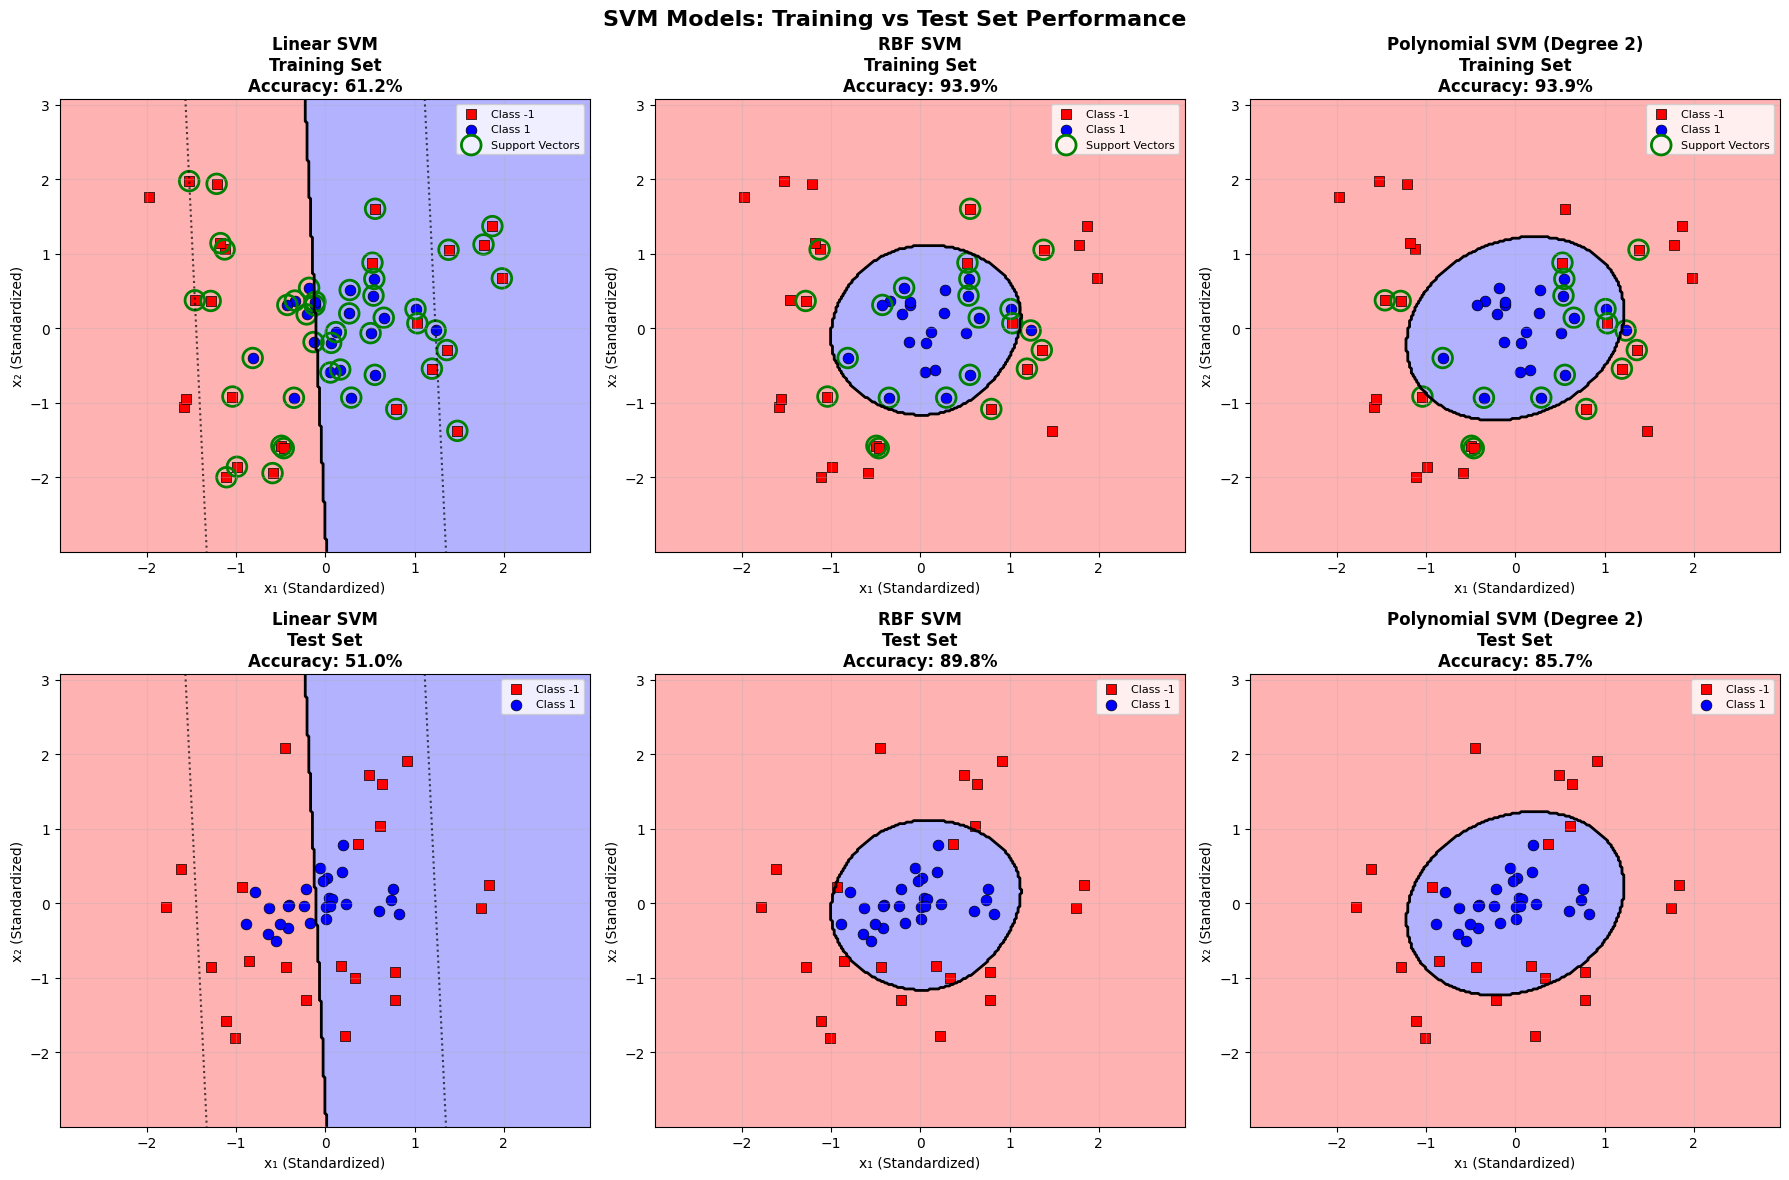

SUMMARY OF ALL MODELS
Model                     Train Acc    Test Acc     Support Vectors Margin Width
--------------------------------------------------------------------------------
Linear SVM                61.2         51.0         46              2.6790      
RBF SVM                   93.9         89.8         23              N/A         
Polynomial SVM (Degree 2) 93.9         85.7         20              N/A         
--------------------------------------------------------------------------------
Total training samples: 8
Total test samples: 49


In [ ]:
# Comprehensive Visualization of All 3 SVM Models
# Plot training and test sets for each model with decision boundaries

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create a comprehensive figure with 6 subplots (3 models × 2 datasets)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SVM Models: Training vs Test Set Performance', fontsize=16, fontweight='bold')

# Define models and their predictions
models = [
    (linear_svm, y_train_pred_linear, y_test_pred_linear, "Linear SVM"),
    (rbf_svm, y_train_pred_rbf, y_test_pred_rbf, "RBF SVM"),
    (poly_svm_degree2, y_train_pred_poly2, y_test_pred_poly2, "Polynomial SVM (Degree 2)")
]

# Define datasets
datasets = [
    (X_train_scaled, y_train_svm, "Training Set"),
    (X_test_scaled, y_test_svm, "Test Set")
]

# Create mesh for decision boundary plotting
def create_mesh(X, h=0.02):
    """Create a mesh for plotting decision boundaries"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Create mesh for all data combined
X_combined = np.vstack([X_train_scaled, X_test_scaled])
xx, yy = create_mesh(X_combined)

# Define colors for classes
colors = ['red', 'blue']
cmap = ListedColormap(colors)

# Plot each model and dataset combination
for model_idx, (model, train_pred, test_pred, model_name) in enumerate(models):
    for dataset_idx, (X_data, y_data, dataset_name) in enumerate(datasets):
        ax = axes[dataset_idx, model_idx]

        # Get predictions for current dataset
        if dataset_idx == 0:  # Training set
            y_pred = train_pred
        else:  # Test set
            y_pred = test_pred

        # Calculate accuracy
        accuracy = accuracy_score(y_data, y_pred) * 100

        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

        # Plot decision boundary as solid line
        ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

        # Plot margin boundaries as dotted lines (for linear SVM only)
        if hasattr(model, 'coef_') and model.coef_ is not None:
            # For linear SVM, we can calculate margin boundaries
            w = model.coef_[0]
            b = model.intercept_[0]

            # Create margin boundaries
            margin_levels = [-1, 1]  # Margin boundaries
            for margin_level in margin_levels:
                # Calculate decision function values for margin
                Z_margin = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b - margin_level
                Z_margin = Z_margin.reshape(xx.shape)
                ax.contour(xx, yy, Z_margin, levels=[0], colors='black',
                          linewidths=1.5, linestyles=':', alpha=0.7)

        # Plot data points
        for class_val, color, marker in [(-1, 'red', 's'), (1, 'blue', 'o')]:
            mask = y_data == class_val
            ax.scatter(X_data[mask, 0], X_data[mask, 1],
                      c=color, marker=marker, s=60,
                      edgecolors='black', linewidth=0.5,
                      label=f'Class {class_val}')

        # Highlight support vectors only for training set plots
        if hasattr(model, 'support_vectors_') and dataset_idx == 0:  # Only for training set
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=200, facecolors='none', edgecolors='green',
                      linewidth=2, label='Support Vectors')

        # Set title and labels
        ax.set_title(f'{model_name}\n{dataset_name}\nAccuracy: {accuracy:.1f}%',
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('x₁ (Standardized)', fontsize=10)
        ax.set_ylabel('x₂ (Standardized)', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 80)
print("SUMMARY OF ALL MODELS")
print("=" * 80)

print(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'Support Vectors':<15} {'Margin Width':<12}")
print("-" * 80)

for model, train_pred, test_pred, model_name in models:
    train_acc = accuracy_score(y_train_svm, train_pred) * 100
    test_acc = accuracy_score(y_test_svm, test_pred) * 100
    n_support = model.n_support_.sum()

    # Calculate margin width (only for linear SVM)
    if hasattr(model, 'coef_') and model.coef_ is not None:
        margin_width = 2 / np.linalg.norm(model.coef_[0])
        margin_str = f"{margin_width:.4f}"
    else:
        margin_str = "N/A"

    print(f"{model_name:<25} {train_acc:<12.1f} {test_acc:<12.1f} {n_support:<15} {margin_str:<12}")

print("-" * 80)
print(f"Total training samples: {len(X_train)}")
print(f"Total test samples: {len(X_test)}")
print("=" * 80)

# The RBF and Polynomial SVM models will only show the decision boundary as solid lines
# since their margin boundaries are more complex to visualize in the original feature space.
